In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import string 
import re

from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/language-detection-datasets/europarl-v7.de-en.en'
path1 = '/content/drive/MyDrive/Colab Notebooks/language-detection-datasets/europarl-v7.de-en.de'
path2 = '/content/drive/MyDrive/Colab Notebooks/language-detection-datasets/europarl-v7.es-en.es'

In [ ]:
english_df = pd.read_csv(path, "ut-8", header=None, names=["English"])
english_df.head()


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,English
0,Resumption of the session
1,I declare resumed the session of the European ...
2,"Although, as you will have seen, the dreaded '..."
3,You have requested a debate on this subject in...
4,"In the meantime, I should like to observe a mi..."


In [ ]:
german_df = pd.read_csv(path1, "utf-8", header=None, names=["German"])
german_df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,German
0,Wiederaufnahme der Sitzungsperiode
1,"Ich erkläre die am Freitag, dem 17. Dezember u..."
2,"Wie Sie feststellen konnten, ist der gefürchte..."
3,Im Parlament besteht der Wunsch nach einer Aus...
4,Heute möchte ich Sie bitten - das ist auch der...


In [ ]:
spanish_df = pd.read_csv(path2, "utf-8", header=None, names=["Spanish"])
spanish_df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Spanish
0,Reanudación del período de sesiones
1,Declaro reanudado el período de sesiones del P...
2,"Como todos han podido comprobar, el gran ""efec..."
3,Sus Señorías han solicitado un debate sobre el...
4,"A la espera de que se produzca, de acuerdo con..."


In [ ]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [ ]:
# Cleaning the data for english dataset
data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [ ]:
# Cleaning the data for German dataset

data_ger = []
lang_ger = []

for i, line in german_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [ ]:
# Cleaning the data for Spanish dataset

data_esp = []
lang_esp = []

for i, line in spanish_df.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Spanish")

In [ ]:
df = pd.DataFrame({
    "Text" : data_eng+data_ger+data_esp,
    "Language" : lang_eng+lang_ger+lang_esp
})

print(df.shape)

(115692, 2)


In [ ]:
df.head(10)

,Text,Language
0,resumption of the session,English
1,i declare resumed the session of the european ...,English
2,although as you will have seen the dreaded mil...,English
3,you have requested a debate on this subject in...,English
4,in the meantime i should like to observe a min...,English
5,please rise then for this minute s silence,English
6,the house rose and observed a minute s silence,English
7,madam president on a point of order,English
8,you will be aware from the press and televisio...,English
9,one of the people assassinated very recently i...,English


In [ ]:
df['Text'][100]

'we have confidence in the commission and in romano prodi and after a difficult procedure as everyone knows the vast majority of our group supported the vote of confidence in romano prodi and the commission'

In [ ]:
df['Language'].value_counts()

English    41361
Spanish    37770
German     36561
Name: Language, dtype: int64

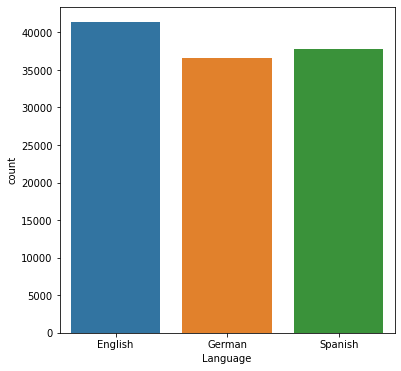

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = df['Language'], data=df)

In [ ]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
len(df[df.duplicated()])

2244

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(113448, 2)

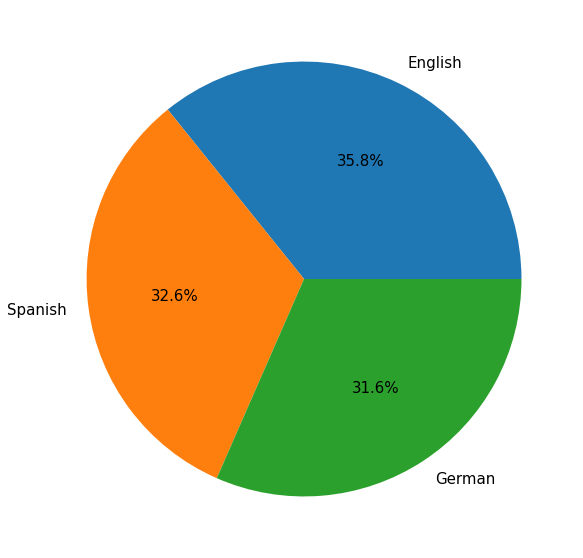

In [ ]:
language = df["Language"].value_counts().reset_index()

plt.figure(figsize=(10,10))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

model using countvectorizer

In [ ]:
#Separating Independent and Dependent features
X = df["Text"]
y = df["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer.]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000) # tokenize a collection of text documents
X = cv.fit_transform(X.values).toarray()
X.shape 

(113448, 1000)

In [ ]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
# Model Training
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#predict output for test dataset
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy is :",ac)

Accuracy is : 0.9981489643014544


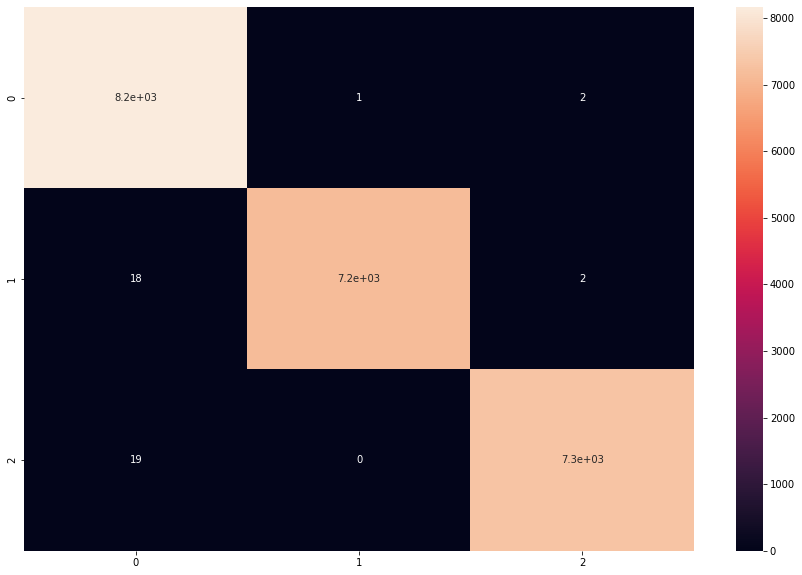

In [ ]:

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
print ("Test Metrics: ", classification_report(y_test, y_pred))

Test Metrics:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      8165
           1       1.00      1.00      1.00      7184
           2       1.00      1.00      1.00      7341

    accuracy                           1.00     22690
   macro avg       1.00      1.00      1.00     22690
weighted avg       1.00      1.00      1.00     22690



In [ ]:
#Predicting with some more data

def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [ ]:
predict('People are awesome')

The langauge is in English


In [ ]:
predict('sie ist gut')

The langauge is in German


In [ ]:
predict('Mucho gusto')

The langauge is in Spanish
